In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib
!pip list
import cv2
import tensorflow as tf
import os
import imghdr
import numpy as np
from matplotlib import pyplot as plt

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record              

In [ ]:
!gdown 1V2PsWoFfpVDJ7Q-B6W5hcXvena13eNRB

Downloading...
From: https://drive.google.com/uc?id=1V2PsWoFfpVDJ7Q-B6W5hcXvena13eNRB
To: /content/data.zip
100% 1.74M/1.74M [00:00<00:00, 122MB/s]


In [ ]:
!unzip -q 'data.zip' -d "data"

Found 155 files belonging to 2 classes.


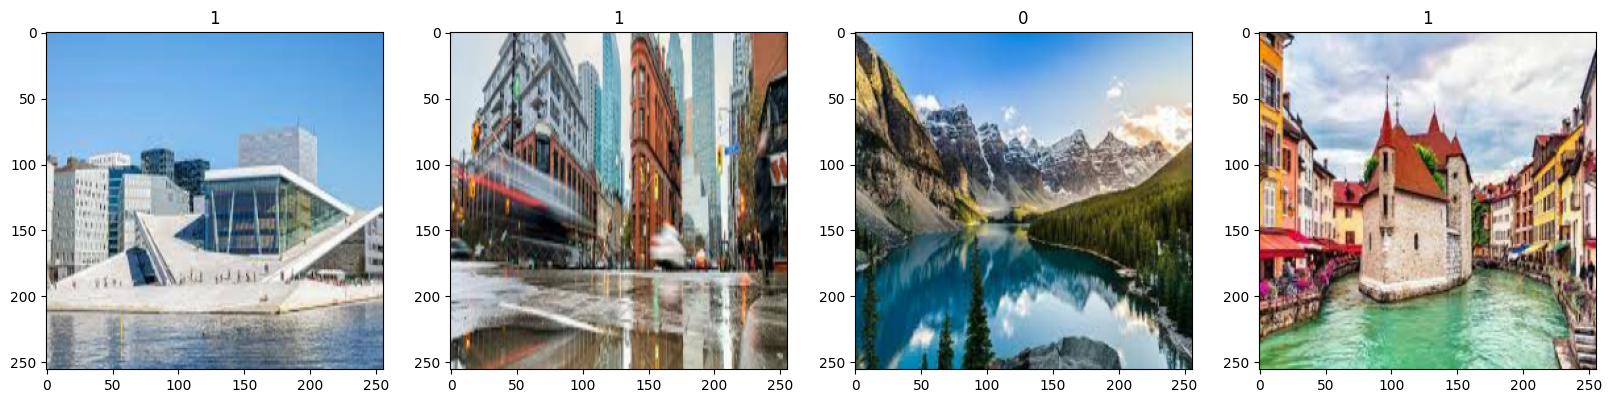

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('data')

data_iterator = data.as_numpy_iterator()

batch = data_iterator.next()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

train_size = int(len(data)*.7) # training set will be 70% of data
val_size = int(len(data)*.2) # validation set size will be 20% of data
test_size = int(len(data)*.1) # test size will be 10%

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout # import needed layers
from tensorflow.keras.models import Sequential # import sequential API. Sequential is good for 1 data input.



model = Sequential() # create a model with sequential class

# Layers are added sequentialy
# 1st layer: convolution has 16 filters ( 3 x 3 pixels inside).
# The power is coming from activation function. Relu is replacing null values.
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
# 2nd layer - choose maximum value after the relu activation (2 x 2)
model.add(MaxPooling2D())
# 3rd layer, output is only 1 value, use 32 filters
model.add(Conv2D(32, (3,3), 1, activation='relu'))
# 4th layer
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
# flatten the data again down
model.add(Flatten())
# convolution has 2 Dense layers
model.add(Dense(256, activation='relu')) # output is 256 values
# The final sigmoid layer, close to 0 are mountains, close to 1 is the city
# Sigmoid activation is non-linear, continuously differentiable, monotonic, and has a fixed output range. Main advantage is simple and good for classifier.
# Sigmoid activation gives rise to a problem of “vanishing gradients” because Its output isn’t zero centered. Sigmoid activation is computationaly more expensive.
model.add(Dense(1, activation='sigmoid')) # single dense layer is the final layer, converts values between 0 and 1


model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

model.summary()
# if the layer is not trainable, there is 0 in Param column
# total params stands for the total size of our model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [ ]:
hist = model.fit(train, epochs=11, validation_data=val)

hist.history

Epoch 1/11
3/3 [==============================] - 10s 3s/step - loss: 1.3786 - accuracy: 0.5104 - val_loss: 1.0091 - val_accuracy: 0.5625
Epoch 2/11
3/3 [==============================] - 5s 2s/step - loss: 0.9506 - accuracy: 0.4792 - val_loss: 0.6937 - val_accuracy: 0.5625
Epoch 3/11
3/3 [==============================] - 8s 3s/step - loss: 0.6916 - accuracy: 0.5625 - val_loss: 0.6891 - val_accuracy: 0.5312
Epoch 4/11
3/3 [==============================] - 5s 2s/step - loss: 0.6879 - accuracy: 0.5833 - val_loss: 0.6753 - val_accuracy: 0.5938
Epoch 5/11
3/3 [==============================] - 8s 3s/step - loss: 0.6715 - accuracy: 0.6562 - val_loss: 0.6630 - val_accuracy: 0.6250
Epoch 6/11
3/3 [==============================] - 6s 2s/step - loss: 0.6421 - accuracy: 0.6146 - val_loss: 0.5876 - val_accuracy: 0.6250
Epoch 7/11
3/3 [==============================] - 7s 3s/step - loss: 0.6432 - accuracy: 0.6042 - val_loss: 0.5173 - val_accuracy: 0.7812
Epoch 8/11
3/3 [========================

{'loss': [1.3786182403564453,
  0.9506036639213562,
  0.6915602684020996,
  0.6878766417503357,
  0.6714634299278259,
  0.6421348452568054,
  0.6431724429130554,
  0.5334047675132751,
  0.5276513695716858,
  0.5198882222175598,
  0.42339852452278137],
 'accuracy': [0.5104166865348816,
  0.4791666567325592,
  0.5625,
  0.5833333134651184,
  0.65625,
  0.6145833134651184,
  0.6041666865348816,
  0.75,
  0.7708333134651184,
  0.75,
  0.8229166865348816],
 'val_loss': [1.0091276168823242,
  0.693668007850647,
  0.6890583038330078,
  0.675317645072937,
  0.663020670413971,
  0.5876127481460571,
  0.5172868967056274,
  0.5157637596130371,
  0.606604278087616,
  0.5177237391471863,
  0.4582977294921875],
 'val_accuracy': [0.5625,
  0.5625,
  0.53125,
  0.59375,
  0.625,
  0.625,
  0.78125,
  0.6875,
  0.6875,
  0.84375,
  0.71875]}

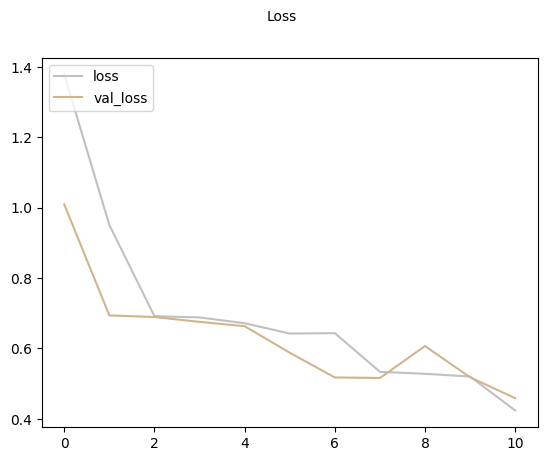

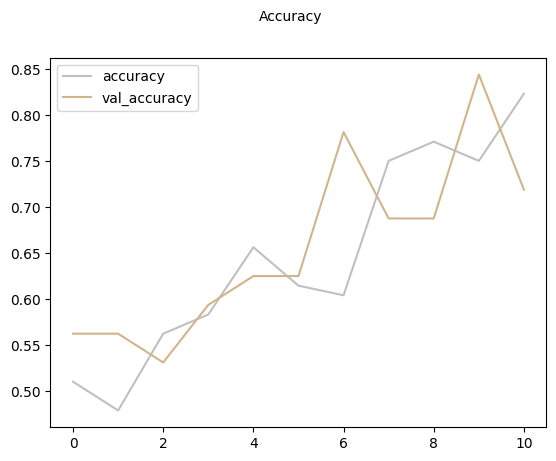

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='silver', label='loss')
plt.plot(hist.history['val_loss'], color='tan', label='val_loss')
fig.suptitle('Loss', fontsize=10)
plt.legend(loc="upper left")
plt.show()


fig = plt.figure()
plt.plot(hist.history['accuracy'], color='silver', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='tan', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=10)
plt.legend(loc="upper left")
plt.show()

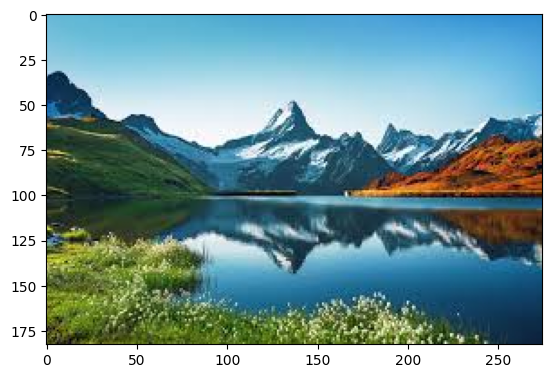

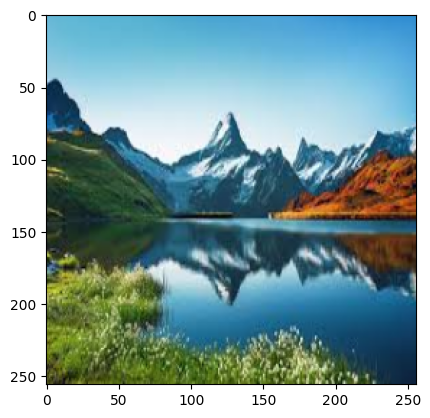

1/1 [==============================] - 0s 239ms/step
[[0.23169379]]
Predicted class is Mountains


In [ ]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# Test the model: read the image that was not used in training
img = cv2.imread('test.jpeg') # bgr colors
if img is None:
    raise ValueError("Image not found. Please check the file path.")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # change bgr colors to rgb
plt.show()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resize = tf.image.resize(img, (256, 256)) # resize the image
plt.imshow(resize.numpy().astype(int))
plt.show()

# expand the shape of a resized image
# insert a new axis that will appear at the axis position in the expanded array shape.
resized_img_expanded = np.expand_dims(resize, 0)

# Predict the class of the image
test_prediction = model.predict(resized_img_expanded / 255.0)
# we divide by 255 to scale the result

print(test_prediction) # closer to mountains (our scale: 0 for mountains and 1 for city)

if test_prediction > 0.5:
    print(f'Predicted class is City')
else:
    print(f'Predicted class is Mountains')


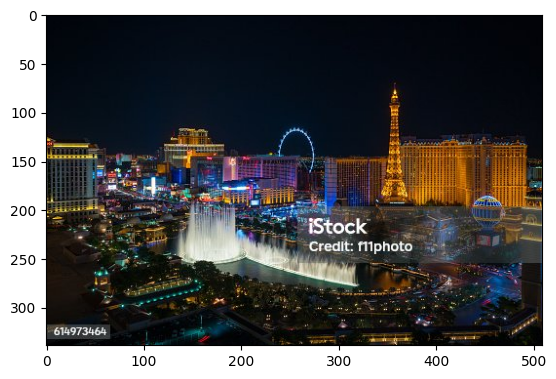

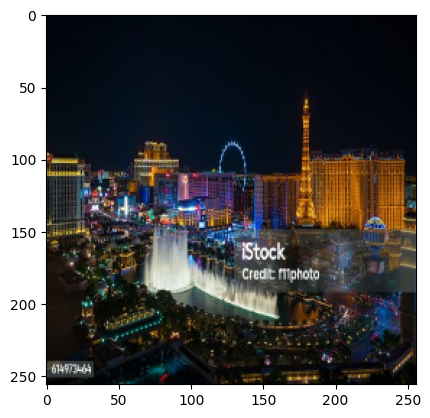

1/1 [==============================] - 0s 51ms/step
[[0.94379854]]
Predicted class is City


In [ ]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# Test the model: read the image that was not used in training
img = cv2.imread('test_city.jpeg') # bgr colors
if img is None:
    raise ValueError("Image not found. Please check the file path.")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # change bgr colors to rgb
plt.show()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resize = tf.image.resize(img, (256, 256)) # resize the image
plt.imshow(resize.numpy().astype(int))
plt.show()

# expand the shape of a resized image
# insert a new axis that will appear at the axis position in the expanded array shape.
resized_img_expanded = np.expand_dims(resize, 0)

# Predict the class of the image
test_prediction = model.predict(resized_img_expanded / 255.0)
# we divide by 255 to scale the result

print(test_prediction) # closer to mountains (our scale: 0 for mountains and 1 for city)

if test_prediction > 0.5:
    print(f'Predicted class is City')
else:
    print(f'Predicted class is Mountains')

Train tem dimensao 256x 256, por isso foi pre-processada daquela forma :

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>